In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the initial latent codes and labels for PCA fitting
latent = np.load('./latents/latent_codes_212.npy')
labels = np.load('./latents/labels.npy')

# Perform PCA on the latent space
pca = PCA(n_components=2)
pca.fit(latent)

# Define a colormap
cmap = plt.get_cmap('viridis', np.unique(labels).size)

# Loop through the different latent code files
for i in range(1, 213):
    latent = np.load(f'./latents/latent_codes_{i}.npy')
    latent_pca = pca.transform(latent)

    # Create a scatter plot with colors based on labels
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(latent_pca[:, 0], latent_pca[:, 1], c=labels, cmap=cmap, s=1)
    plt.colorbar(scatter, ticks=np.unique(labels))
    plt.title(f'PCA of Latent Space - File {i}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()


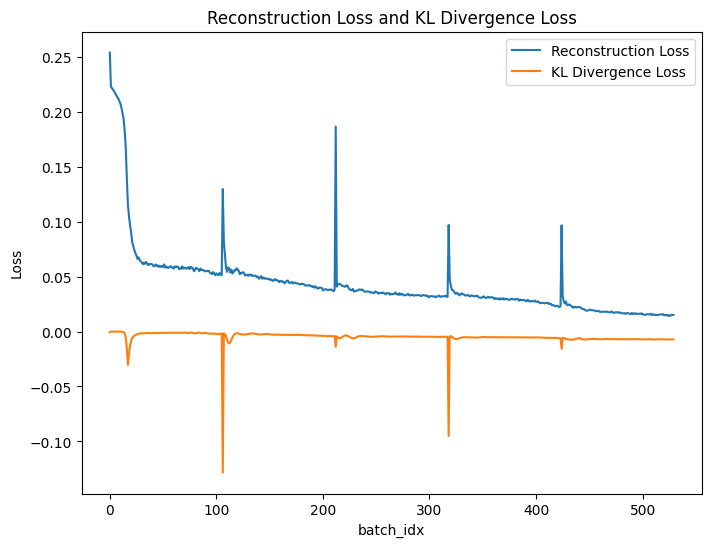

In [32]:
recon_losses = np.load('./latents/recon_losses_full.npy')
kl_losses = np.load('./latents/kl_losses_full.npy')  
kl_losses = 0.00025 * kl_losses

# Plot the recon_losses and kl_losses arrays
plt.figure(figsize=(8, 6))
plt.plot(recon_losses, label='Reconstruction Loss')
plt.plot(kl_losses, label='KL Divergence Loss')
plt.xlabel('batch_idx')
plt.ylabel('Loss')
plt.title('Reconstruction Loss and KL Divergence Loss')
plt.legend()
plt.show()